# Read data from xlsx

In [1]:
from __future__ import division, generators, absolute_import, print_function

# Table 2: some statistics

In [11]:
def ReadFromXls(file, cols, rows, types, sorted = True, verbose = True):
    # Read file.xlsx and extract a 2d list 
    # Inputs:
    #   file    : str of file location
    #   cols    : list/tuple of selected columns
    #   rows    : list/tuple of selected rows
    #   types   : a tuple of allowed types, e.g. (int, long)
    #   sorted  : boolean whether to sort each row (only valid when types are numerics)
    #   verbose : boolean whether to print what's going on
    # Output:
    #   a 2d list of integers
    if verbose: print('****** ReadFromXls: Read file.xlsx and extract a 2d list *****')
    from openpyxl import load_workbook
    wb  = load_workbook(file) 
    if verbose: print('-- Opened file:', file)
    if verbose: print('-- Sheet names:', wb.get_sheet_names(), 'Using Sheet1 as default.')
    ws = wb.get_sheet_by_name('Sheet1')
    if verbose: print('-- A1 (typically the title):', ws['A1'].value)
    rawData = []
    for i in rows:
        oneRow = []
        for j in cols:
            entry = ws[j + str(i)].value
            if isinstance(entry, types):
                oneRow.append(entry)
            else:
                break
        if len(oneRow) == len(cols):
            if sorted: oneRow.sort()
            rawData.append(oneRow)
    if verbose: print('-- successfully read ', len(rawData), 'full lines!')
    if verbose: print('************************ finished. *************************')
    return rawData

## RTS Colony counts

In [34]:
file = '../data/Bishayee Colony Counts 10.27.97-3.8.01.xlsx'
data1 = ReadFromXls(file, ('D', 'E', 'F'), rows = range(4, 1366), types = (int))
cleanData1 = [x for x in data1 if x[0] <= x[2] - 2] # filter out triples with gap < 2
print(len(cleanData1))
print(len([x for x in cleanData1 if x[1] == round((x[0] + x[1] + x[2])/3.) ]))

****** ReadFromXls: Read file.xlsx and extract a 2d list *****
-- Opened file: ../data/Bishayee Colony Counts 10.27.97-3.8.01.xlsx
-- Sheet names: ['Sheet1'] Using Sheet1 as default.
-- A1 (typically the title): Bishayee Colony Counts 128 experiments
-- successfully read  1361 full lines!
************************ finished. *************************
1343
690


## RTS Coulter counts

In [83]:
file = '../data/Bishayee Coulter Counts.10.20.97-7.16.01.xlsx'
RTScoulterData = ReadFromXls(file, ('C', 'D', 'E'), rows = range(3, 1732), types = (int))
RTScoulterData_clean = [x for x in RTScoulterData if x[0] <= x[2] - 2] # filter out triples with gap < 2
print(len(RTScoulterData_clean))
print(len([x for x in RTScoulterData_clean if x[1] == round((x[0] + x[1] + x[2])/3.) ]))

****** ReadFromXls: Read file.xlsx and extract a 2d list *****
-- Opened file: ../data/Bishayee Coulter Counts.10.20.97-7.16.01.xlsx
-- Sheet names: ['Sheet1'] Using Sheet1 as default.
-- A1 (typically the title): Bishayee Coulters
-- successfully read  1727 full lines!
************************ finished. *************************
1726
176


## Other investigators colony counts

In [67]:
file = '../data/Other Investigators in Lab.Colony Counts.4.23.92-11.27.02.xlsx'
data2 = ReadFromXls(file, ('D', 'E', 'F'), rows = range(3, 623), types = (int))
cleanData2 = [x for x in data2 if x[0] <= x[2] - 2]
print(len(cleanData2))
print(len([x for x in cleanData2 if x[1] == round((x[0] + x[1] + x[2])/3.) ]))

****** ReadFromXls: Read file.xlsx and extract a 2d list *****
-- Opened file: ../data/Other Investigators in Lab.Colony Counts.4.23.92-11.27.02.xlsx
-- Sheet names: ['Sheet1'] Using Sheet1 as default.
-- A1 (typically the title): Others in Howell lab
-- successfully read  596 full lines!
************************ finished. *************************
577
109


## Other investigators coulter counts

In [84]:
file = '../data/Other Investigators in Lab.Coulter Counts.4.15.92-5.21.05.xlsx'
OtherCoulterData = ReadFromXls(file, ('C', 'D', 'E'), rows = range(3, 1010), types = (int))
OtherCoulterData_clean = [x for x in OtherCoulterData if x[0] <= x[2] - 2]
print(len(OtherCoulterData_clean))
print(len([x for x in OtherCoulterData_clean if x[1] == round((x[0] + x[1] + x[2])/3.) ]))

****** ReadFromXls: Read file.xlsx and extract a 2d list *****
-- Opened file: ../data/Other Investigators in Lab.Coulter Counts.4.15.92-5.21.05.xlsx
-- Sheet names: ['Sheet1'] Using Sheet1 as default.
-- A1 (typically the title): Other Investigators in the Lab
-- successfully read  929 full lines!
************************ finished. *************************
929
36


## Outside lab 1 coulter counts

In [87]:
file = '../data/Outside Lab 1.Coulter Counts.6.7.91-4.9.99.xlsx'
Lab1CoulterData = ReadFromXls(file, ('B', 'C', 'D'), rows = range(2, 111), types = (int))
Lab1CoulterData_clean = [x for x in Lab1CoulterData if x[0] <= x[2] - 2]
print(len(Lab1CoulterData_clean))
print(len([x for x in Lab1CoulterData_clean if x[1] == round((x[0] + x[1] + x[2])/3.) ]))

****** ReadFromXls: Read file.xlsx and extract a 2d list *****
-- Opened file: ../data/Outside Lab 1.Coulter Counts.6.7.91-4.9.99.xlsx
-- Sheet names: ['Sheet1'] Using Sheet1 as default.
-- A1 (typically the title): Outside Lab 1 Coulter Counts
-- successfully read  97 full lines!
************************ finished. *************************
97
0


## Outside lab 2 coulter counts

In [88]:
file = '../data/Outside Lab 2.Coulter Counts.6.6.08-7.7.08.xlsx'
Lab2CoulterData = ReadFromXls(file, ('B', 'C', 'D'), rows = range(3, 123), types = (int))
Lab2CoulterData_clean = [x for x in Lab2CoulterData if x[0] <= x[2] - 2]
print(len(Lab2CoulterData_clean))
print(len([x for x in Lab2CoulterData_clean if x[1] == round((x[0] + x[1] + x[2])/3.) ]))

****** ReadFromXls: Read file.xlsx and extract a 2d list *****
-- Opened file: ../data/Outside Lab 2.Coulter Counts.6.6.08-7.7.08.xlsx
-- Sheet names: ['Sheet1'] Using Sheet1 as default.
-- A1 (typically the title): Outside Lab 2
-- successfully read  120 full lines!
************************ finished. *************************
120
1


## Outside lab 3 colony counts

In [81]:
file = '../data/Outside Lab 3.Colony Counts.2.4.10-5.21.12.xlsx'
data3 = ReadFromXls(file, ('B', 'C', 'D'), rows = range(3, 53), types = (int))
cleanData3 = [x for x in data3 if x[0] <= x[2] - 2]
print(len(cleanData3))
print(len([x for x in cleanData3 if x[1] == round((x[0] + x[1] + x[2])/3.) ]))

****** ReadFromXls: Read file.xlsx and extract a 2d list *****
-- Opened file: ../data/Outside Lab 3.Colony Counts.2.4.10-5.21.12.xlsx
-- Sheet names: ['Sheet1'] Using Sheet1 as default.
-- A1 (typically the title): Outside Lab 3 Colonies
-- successfully read  50 full lines!
************************ finished. *************************
49
3


### Figure 1:

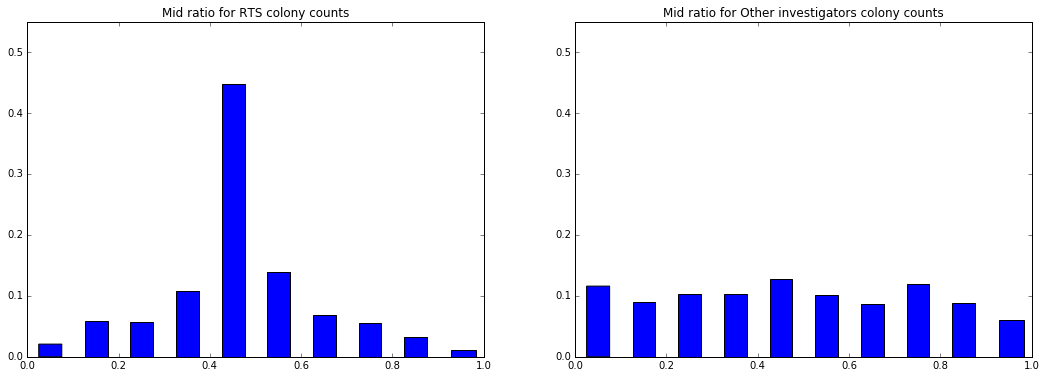

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

tmp1 = [(x[1] - x[0])*1.0/max(x[2] - x[0],1) for x in cleanData1]
tmp2 = [(x[1] - x[0])*1.0/max(x[2] - x[0],1) for x in cleanData2]
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
counts, bins, ignored = plt.hist(tmp1, [0, .101, .201, .301, .401, .501, .601, .701, .801, .901, 1.01], 
                                 rwidth=0.5, weights=np.zeros_like(tmp1) + 1. / len(tmp1))
plt.ylim(0, .55)
plt.title('Mid ratio for RTS colony counts')
plt.subplot(1, 2, 2)
counts, bins, ignored = plt.hist(tmp2, [0, .101, .201, .301, .401, .501, .601, .701, .801, .901, 1.01],
                                 rwidth=0.5, weights=np.zeros_like(tmp2) + 1. / len(tmp2))
plt.ylim(0, .55)
plt.title('Mid ratio for Other investigators colony counts')
plt.show()
# print(bins)
# print(counts)

** Unresolved issues: **
* notice: must delete those with gap smaller than 2.
* the figure looks a little bit different from (a), see 0.3 and 0.9
* (b)

### Table 1:

In [5]:
from scipy.stats import poisson
import numpy as np

In [2]:
def calc_P(i):
    P = 0
    # N is the truncation number of Poisson
    N = int(poisson.ppf(1 - 1e-9, i))
    for j in range(2, N):
        for k in range(j, N):
            P += 6 * poisson.pmf(k - j, i) * poisson.pmf(k, i) * poisson.pmf(k - int(j/2), i)
            # just to follow the usage in Yu's code, I add int in poisson.pmf(k - int(j/2), i),
            # do we really need to round the number?
            if j % 2 == 1:
                P += 6 * poisson.pmf(k - j, i) * poisson.pmf(k, i) * poisson.pmf(k - int(j/2) - 1, i)
    return P

In [3]:
def calc_P_new(i):
    P = 0
    # N is the truncation number of Poisson
    Nmax = int(poisson.ppf(1 - 1e-10, i))
    Nmin = int(poisson.ppf(1e-10, i))
    for mid in range(Nmin, Nmax):
        tmp  = poisson.pmf(mid, i)
        P += 3 * tmp * (poisson.pmf(2 * mid, 2 * i) - tmp**2)
        P += 3 * tmp * (poisson.pmf(2 * mid + 1, 2 * i) - 2 * tmp * poisson.pmf(mid + 1, i))
        P += 3 * tmp * (poisson.pmf(2 * mid - 1, 2 * i) - 2 * tmp * poisson.pmf(mid - 1, i))
    return P

In [9]:
import time
lamMax  = 25
#para = np.concatenate((np.arange(1,2001), np.arange(2100,10001,100), np.arange(11000,60000,1000)))
P = [calc_P_new(i) for i in range(1, lamMax)]
start = time.time()
#P_new = [calc_P_new(i) for i in para]
end   = time.time()
for i in P:
    print('%0.3f' % i)
# print(P_new)
print(end - start)
# poisson.ppf(1 - 1e-9, 1000)

0.267
0.387
0.403
0.397
0.385
0.372
0.359
0.348
0.337
0.327
0.317
0.309
0.301
0.294
0.287
0.281
0.275
0.269
0.264
0.259
0.254
0.250
0.246
0.242
7.271766662597656e-05


In [75]:
# Write mid probability to txt
#P_to_txt = [[lam, P_new[lam-1]] for lam in range(1,len(P_new))]
P_to_txt = [[para[i], P_new[i]] for i in range(len(para))]
output_dir = "../outputs/"

with open(output_dir + "MidProb.txt", 'w') as f:
    for item in P_to_txt:
        f.write('\t'.join(map(repr, item)) + '\n')

** Reflection: **

* Did not include the prob that small = medium = big and no justification.

* Poisson distribution with same mean is not very convincing. Can be more non-parametric (bootstrap from other people's data).

### Hypothesis testing I:

In [44]:
file = '../data/Other Investigators in Lab.Colony Counts.4.23.92-11.27.02.xlsx'
rawData2 = ReadFromXls(file, ('C', 'D', 'E', 'F'), rows = range(3, 623), types = (int, str), sorted = False)
invs = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
for name in invs:
    data = [np.sort(x[1:4]) for x in rawData2 if x[0] == name]
    x = data[0]
    containMean = [x for x in data if int(x[0] + x[1] + x[2])/3 == int(x[1])]
    print(name, len(data), len(containMean))
    
# print(len(cleanData2))
# print(len([x for x in cleanData2 if x[1] == round((x[0] + x[1] + x[2])/3.) ]))

****** ReadFromXls: Read file.xlsx and extract a 2d list *****
-- Opened file: ../data/Other Investigators in Lab.Colony Counts.4.23.92-11.27.02.xlsx
-- Sheet names: ['Sheet1'] Using Sheet1 as default.
-- A1 (typically the title): Others in Howell lab
-- successfully read  598 full lines!
************************ finished. *************************
A 257 18
B 58 1
C 89 14
D 80 3
E 10 0
F 29 2
G 9 1
H 21 0
I 45 1


In [15]:
from scipy.stats import binom
print(1 - binom.cdf(690 - 1, 1343, 0.42))
print(1 - binom.cdf(109 - 1,  572, 0.13))

2.85338419559e-12
2.82052399667e-05


** Reflection: **
    
* It is not reasonable to consider binomial: some experiments might be correlated. 

* It will be of interest to check the p-value of other people. What if it is significant as well?

## Poisson test

In [ ]:
def TriplePoissonTest(data, verbose = True, plot = True){
    # Test whether given list of triples come from Poisson test
    # Inputs:
    #   data: list of triples, integer
    #   verbose: boolean whether to print information
    #   plot: boolean whether to plot the figure
    # Outputs:
    #   flag: boolean whether can we reject the null hypothesis that triples are from poisson
}